In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from arabic_reshaper import reshape
from bidi.algorithm import get_display


In [2]:
df = pd.read_csv('Neek Language Learning App Questionnaire - Latest Version.csv')

In [4]:
df

,Timestamp,Username,Subject ID\n(این سوال را فقط مسئول جمع آوری داده پاسخ دهد)\nsample: D[device number]-[last four digits of phone number],اگر این برنامه در دسترس شما باشد، روزانه حدوداً چند دقیقه را به آن اختصاص می‌دهید؟,اگر این برنامه در دسترس شما باشد در طول یک هفته چند بار برای مرور یا مطالعه مباحث جدید به این برنامه رجوع میکنید؟,فکر میکنید اشتراک نامحدود نیک هم قیمت کدام یک از این گزینه ها باشد؟,استفاده از این برنامه چگونه بود؟,قسمت پادکست در برنامه را چطور ارزیابی می‌کنید؟,آزمون انتهای هر بخش را چگونه ارزیابی می کنید؟,رنگ های به کار رفته در برنامه را چطور ارزیابی میکنید؟,فضای گرافیکی و ظاهر برنامه (شکل و اندازه علامت ها و ... ) را چطور ارزیابی میکنید؟,کدام بخش برنامه برای شما جذابیت بیشتری داشت؟,کدام بخش برنامه را دوست نداشتید؟,شما متعلق به کدام گروه سنی هستید؟,جنسیت شما چیست؟,کجا زندگی می کنید؟,چقدر احتمال دارد اپلیکیشن نیک را به دیگران معرفی کنید؟,آیا از اطرافیان خود کسی را میشناسید که به این برنامه نیاز داشته باشد؟,آیا می خواهید چیز بیشتری در مورد تجربه امروز خود در استفاده از این برنامه به اشتراک بگذارید؟\nما نظرات شما را با دقت می خوانیم.
0,2024/02/15 8:55:32 PM GMT+3:30,behpas.tehran@gmail.com,D01-5302,۰ تا ۱۵ دقیقه,۰ تا ۲ بار در هفته,D,کمی گیج کننده بود.,پادکست را امتحان کردم و خوشم نیامد.,انگیزه ی من را برای ادامه کار با برنامه کم کرد.,نظری ندارم.,به نظرم باید بیشتر مورد بررسی قرار گیرد.,آزمون,پادکست,۴۰ - ۵۰,زن,شهر تهران,به هیچ وجه معرفی نمیکنم.,بله,NaN
1,2024/02/18 11:12:21 AM GMT+3:30,behpas.tehran@gmail.com,D02-8226,۰ تا ۱۵ دقیقه,۰ تا ۲ بار در هفته,F,بعد از کمی تلاش راه افتادم.,پادکست را امتحان کردم و برایم جالب بود.,تاثیری درانگیزه ام نداشت.,رنگ ها خوب انتخاب شده اند.,نظری ندارم.,شنیداری,دستور زبان (گرامر),۳۰ - ۴۰,مرد,شهر تهران,نظری ندارم.,بله,NaN
2,2024/02/18 12:34:18 PM GMT+3:30,behpas.tehran@gmail.com,D01-3772,۱۵ تا ۳۰ دقیقه,۰ تا ۲ بار در هفته,C,فرقی با برنامه هایی که استفاده میکنم نداشت.,پادکست را گوش ندادم چون وقت کافی نبود.,تاثیری درانگیزه ام نداشت.,به نظرم انتخاب رنگ باید بیشتر مورد بررسی قرار ...,به نظرم باید بیشتر مورد بررسی قرار گیرد.,دستور زبان (گرامر),ویدئوهای آموزشی,۳۰ - ۴۰,مرد,شهر تهران,شاید معرفی کنم.,بله,Barname khobi bod . Ye meghdar moshkel hang ka...
3,2024/02/18 1:52:17 PM GMT+3:30,behpas.tehran@gmail.com,D02-7786,۰ تا ۱۵ دقیقه,۰ تا ۲ بار در هفته,F,کمی گیج کننده بود.,پادکست را امتحان کردم و خوشم نیامد.,انگیزه ی من را برای ادامه کار با برنامه کم کرد.,رنگ ها بسیار بد انتخاب شده اند.,بسیار بد طراحی شده بود.,یاد گرفتن لغات,دستور زبان (گرامر),۳۰ - ۴۰,مرد,شهر تهران,به هیچ وجه معرفی نمیکنم.,بله,Eftezah blood!
4,2024/02/21 10:17:31 AM GMT+3:30,behpas.tehran@gmail.com,D01-6310,۱۵ تا ۳۰ دقیقه,۰ تا ۲ بار در هفته,H,خیلی راحت بود.,پادکست را امتحان کردم و برایم جالب بود.,عالی بود و من را برای ادامه دادن ترغیب کرد.,رنگ ها بسیار بد انتخاب شده اند.,به نظرم باید بیشتر مورد بررسی قرار گیرد.,ویدئوهای آموزشی,دستور زبان (گرامر);خواندن,۴۰ - ۵۰,زن,شهر تهران,شاید معرفی کنم.,بله,NaN
5,2024/02/21 10:37:46 AM GMT+3:30,behpas.tehran@gmail.com,D02-9545,۳۰ تا ۶۰ دقیقه,۲ تا ۵ بار در هفته,B,خیلی راحت بود.,پادکست را امتحان کردم و برایم جالب بود.,عالی بود و من را برای ادامه دادن ترغیب کرد.,به نظرم انتخاب رنگ باید بیشتر مورد بررسی قرار ...,نظری ندارم.,دستور زبان (گرامر),دستور زبان (گرامر),۵۰ - ۶۰,مرد,شهر تهران,شاید معرفی کنم.,بله,NaN
6,2024/02/21 12:13:23 PM GMT+3:30,behpas.tehran@gmail.com,D01-5340,۱۵ تا ۳۰ دقیقه,۲ تا ۵ بار در هفته,E,بعد از کمی تلاش راه افتادم.,نتوانستم از قسمت پادکست استفاده کنم.,عالی بود و من را برای ادامه دادن ترغیب کرد.,به نظرم انتخاب رنگ باید بیشتر مورد بررسی قرار ...,به نظرم باید بیشتر مورد بررسی قرار گیرد.,یاد گرفتن لغات;آزمون,هیچکدام,۴۰ - ۵۰,مرد,شهر تهران,حتما معرفی میکنم.,بله,NaN
7,2024/02/21 12:19:43 PM GMT+3:30,behpas.tehran@gmail.com,D02-4030,۰ تا ۱۵ دقیقه,۲ تا ۵ بار در هفته,G,بعد از کمی تلاش راه افتادم.,پادکست را امتحان کردم و برایم جالب بود.,تاثیری درانگیزه ام نداشت.,به نظرم انتخاب رنگ باید بیشتر مورد بررسی قرار ...,به نظرم باید بیشتر مورد بررسی قرار گیرد.,یاد گرفتن لغات,هیچکدام,۵۰ - ۶۰,مرد,شهر تهران,نظری ندارم.,بله,NaN
8,2024/02/21 12:50:17 PM GMT+3:30,behpas.tehran@gmail.com,D02-3569,بیش از

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 19 columns):
 #   Column                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                          --------------  ----- 
 0   Timestamp                                                                                                                       24 non-null     object
 1   Username                                                                                                                        24 non-null     object
 2   Subject ID
(این سوال را فقط مسئول جمع آوری داده پاسخ دهد)
sample: D[device number]-[last four digits of phone number]           24 non-null     object
 3   اگر این برنامه در دسترس شما باشد، روزانه حدوداً چند دقیقه را به آن اختصاص می‌دهید؟                              

In [6]:
column_names = df.columns
print(column_names)

Index(['Timestamp', 'Username',
       'Subject ID\n(این سوال را فقط مسئول جمع آوری داده پاسخ دهد)\nsample: D[device number]-[last four digits of phone number]',
       'اگر این برنامه در دسترس شما باشد، روزانه حدوداً چند دقیقه را به آن اختصاص می‌دهید؟',
       'اگر این برنامه در دسترس شما باشد در طول یک هفته چند بار برای مرور یا مطالعه مباحث جدید به این برنامه رجوع میکنید؟',
       'فکر میکنید اشتراک نامحدود نیک هم قیمت کدام یک از این گزینه ها باشد؟',
       'استفاده از این برنامه چگونه بود؟',
       'قسمت پادکست در برنامه را چطور ارزیابی می‌کنید؟',
       'آزمون انتهای هر بخش را چگونه ارزیابی می کنید؟',
       ' رنگ های به کار رفته در برنامه را چطور ارزیابی میکنید؟',
       ' فضای گرافیکی و ظاهر برنامه (شکل و اندازه علامت ها و ... ) را چطور ارزیابی میکنید؟',
       'کدام بخش برنامه برای شما جذابیت بیشتری داشت؟',
       'کدام بخش برنامه را دوست نداشتید؟', 'شما متعلق به کدام گروه سنی هستید؟',
       'جنسیت شما چیست؟', 'کجا زندگی می کنید؟',
       'چقدر احتمال دارد اپلیکیشن نیک را به دی

In [7]:
new_column_names = ['Timestamp', 'Username', 'ID', 'daily_engagement_minute', 'daily_engagement_pickup',
                    'subscription_price', 'how_easy', 'podcast', 'test', 'colours', 'graphics',
                    'favourite_part', 'least_favourite_part', 'age', 'gender', 'city', 'recommend',
                    'do you know anyone who would need this app?', 'comments']
df.columns = new_column_names
df = df.drop(columns=['Timestamp', 'Username'])



In [8]:
df.head()

,ID,daily_engagement_minute,daily_engagement_pickup,subscription_price,how_easy,podcast,test,colours,graphics,favourite_part,least_favourite_part,age,gender,city,recommend,do you know anyone who would need this app?,comments
0,D01-5302,۰ تا ۱۵ دقیقه,۰ تا ۲ بار در هفته,D,کمی گیج کننده بود.,پادکست را امتحان کردم و خوشم نیامد.,انگیزه ی من را برای ادامه کار با برنامه کم کرد.,نظری ندارم.,به نظرم باید بیشتر مورد بررسی قرار گیرد.,آزمون,پادکست,۴۰ - ۵۰,زن,شهر تهران,به هیچ وجه معرفی نمیکنم.,بله,NaN
1,D02-8226,۰ تا ۱۵ دقیقه,۰ تا ۲ بار در هفته,F,بعد از کمی تلاش راه افتادم.,پادکست را امتحان کردم و برایم جالب بود.,تاثیری درانگیزه ام نداشت.,رنگ ها خوب انتخاب شده اند.,نظری ندارم.,شنیداری,دستور زبان (گرامر),۳۰ - ۴۰,مرد,شهر تهران,نظری ندارم.,بله,NaN
2,D01-3772,۱۵ تا ۳۰ دقیقه,۰ تا ۲ بار در هفته,C,فرقی با برنامه هایی که استفاده میکنم نداشت.,پادکست را گوش ندادم چون وقت کافی نبود.,تاثیری درانگیزه ام نداشت.,به نظرم انتخاب رنگ باید بیشتر مورد بررسی قرار ...,به نظرم باید بیشتر مورد بررسی قرار گیرد.,دستور زبان (گرامر),ویدئوهای آموزشی,۳۰ - ۴۰,مرد,شهر تهران,شاید معرفی کنم.,بله,Barname khobi bod . Ye meghdar moshkel hang ka...
3,D02-7786,۰ تا ۱۵ دقیقه,۰ تا ۲ بار در هفته,F,کمی گیج کننده بود.,پادکست را امتحان کردم و خوشم نیامد.,انگیزه ی من را برای ادامه کار با برنامه کم کرد.,رنگ ها بسیار بد انتخاب شده اند.,بسیار بد طراحی شده بود.,یاد گرفتن لغات,دستور زبان (گرامر),۳۰ - ۴۰,مرد,شهر تهران,به هیچ وجه معرفی نمیکنم.,بله,Eftezah blood!
4,D01-6310,۱۵ تا ۳۰ دقیقه,۰ تا ۲ بار در هفته,H,خیلی راحت بود.,پادکست را امتحان کردم و برایم جالب بود.,عالی بود و من را برای ادامه دادن ترغیب کرد.,رنگ ها بسیار بد انتخاب شده اند.,به نظرم باید بیشتر مورد بررسی قرار گیرد.,ویدئوهای آموزشی,دستور زبان (گرامر);خواندن,۴۰ - ۵۰,زن,شهر تهران,شاید معرفی کنم.,بله,NaN


In [9]:
def reshape_text(text):
    reshaped_text = reshape(text)
    bidi_text = get_display(reshaped_text)
    return bidi_text

In [15]:
unique_values = df['colours'].unique()
print(unique_values)

['نظری ندارم.' 'رنگ ها خوب انتخاب شده اند.'
 'به نظرم انتخاب رنگ باید بیشتر مورد بررسی قرار گیرد.'
 'رنگ ها بسیار بد انتخاب شده اند.']


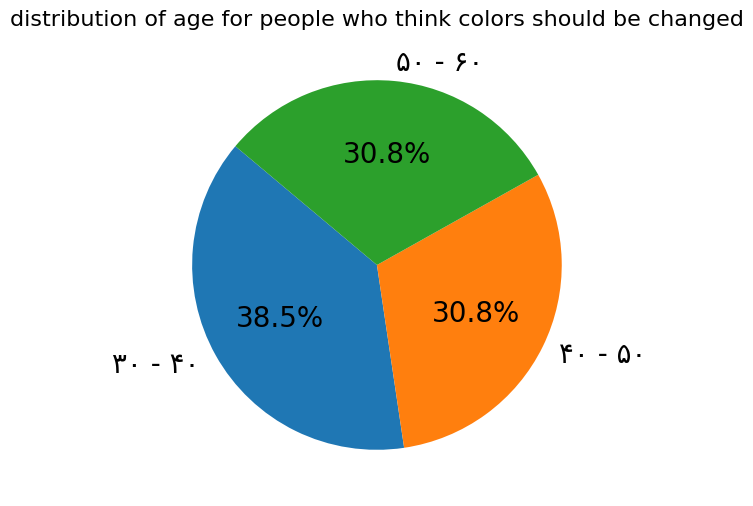

In [16]:
filter_condition = df['colours'].isin(['به نظرم انتخاب رنگ باید بیشتر مورد بررسی قرار گیرد.', 'رنگ ها بسیار بد انتخاب شده اند.'])
filtered_df = df[filter_condition]


plt.figure(figsize=(8, 6))
filtered_df['age'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, fontsize=20)
plt.title('distribution of age for people who think colors should be changed', fontsize=16)
plt.ylabel('')

plt.show()

# rest_df = df[~filter_condition]

# plt.figure(figsize=(8, 6))
# rest_df['age'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, fontsize=20)
# plt.title('distribution of age for others', fontsize=16)
# plt.ylabel('')

# plt.show()


C:\Users\aslan\AppData\Local\Temp\ipykernel_14020\3312126177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['gender'] = filtered_df['gender'].apply(reshape_text)


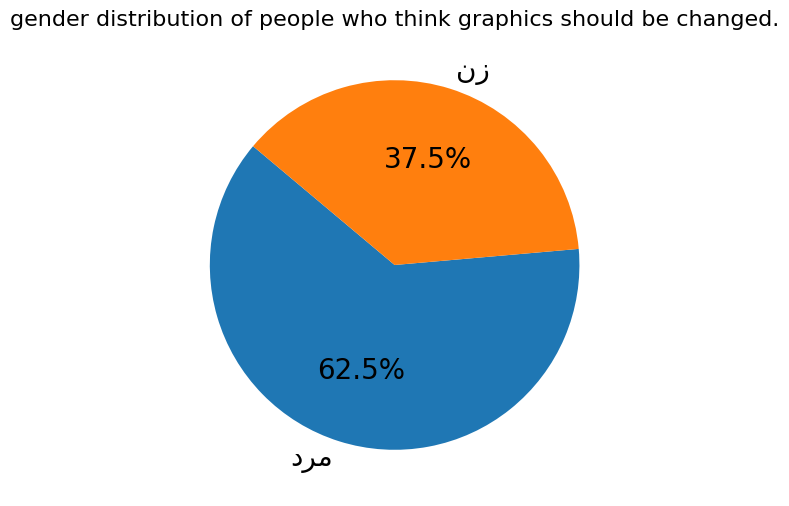

In [12]:
filter_condition = df['graphics'].isin(['به نظرم باید بیشتر مورد بررسی قرار گیرد.', 'بسیار بد طراحی شده بود.'])
filtered_df = df[filter_condition]

plt.figure(figsize=(8, 6))
filtered_df['gender'] = filtered_df['gender'].apply(reshape_text)
filtered_df['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, fontsize=20)
plt.title('gender distribution of people who think graphics should be changed.', fontsize=16)
plt.ylabel('')

plt.show()

# rest_df = df[~filter_condition]
# rest_df['gender'] = rest_df['gender'].apply(reshape_text)
# plt.figure(figsize=(8, 6))
# rest_df['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, fontsize=20)
# plt.title('gender Distribution for others', fontsize=16)
# plt.ylabel('')

# plt.show()


In [12]:
unique_values = df['recommend'].unique()
print(unique_values)

['به هیچ وجه معرفی نمیکنم.' 'نظری ندارم.' 'شاید معرفی کنم.'
 'حتما معرفی میکنم.' 'احتمالا معرفی نمیکنم.']


C:\Users\aslan\AppData\Local\Temp\ipykernel_13668\169281764.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['least_favourite_part'] = filtered_df['least_favourite_part'].apply(reshape_text)


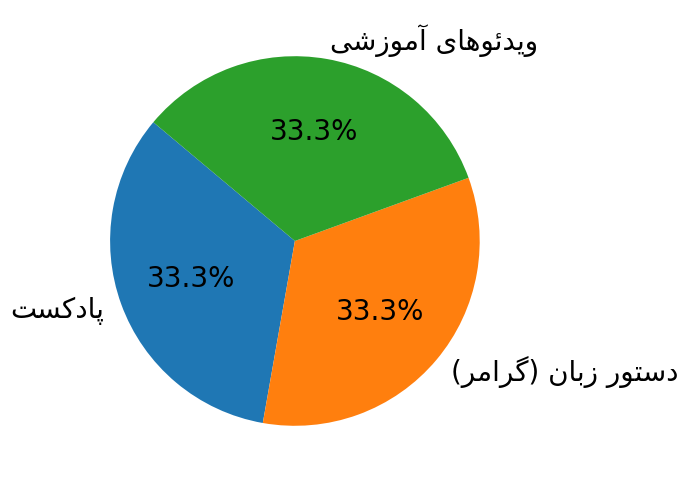

In [13]:
filter_condition = df['recommend'].isin(['احتمالا معرفی نمیکنم.', 'به هیچ وجه معرفی نمیکنم.'])
filtered_df = df[filter_condition]


plt.figure(figsize=(8, 6))
filtered_df['least_favourite_part'] = filtered_df['least_favourite_part'].apply(reshape_text)
filtered_df['least_favourite_part'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, fontsize=20)

plt.ylabel('')

plt.show()

In [17]:
filtered_df

,ID,daily_engagement_minute,daily_engagement_pickup,subscription_price,how_easy,podcast,test,colours,graphics,favourite_part,least_favourite_part,age,gender,city,recommend,do you know anyone who would need this app?,comments
2,D01-3772,۱۵ تا ۳۰ دقیقه,۰ تا ۲ بار در هفته,C,فرقی با برنامه هایی که استفاده میکنم نداشت.,پادکست را گوش ندادم چون وقت کافی نبود.,تاثیری درانگیزه ام نداشت.,به نظرم انتخاب رنگ باید بیشتر مورد بررسی قرار ...,به نظرم باید بیشتر مورد بررسی قرار گیرد.,دستور زبان (گرامر),ویدئوهای آموزشی,۳۰ - ۴۰,مرد,شهر تهران,شاید معرفی کنم.,بله,Barname khobi bod . Ye meghdar moshkel hang ka...
3,D02-7786,۰ تا ۱۵ دقیقه,۰ تا ۲ بار در هفته,F,کمی گیج کننده بود.,پادکست را امتحان کردم و خوشم نیامد.,انگیزه ی من را برای ادامه کار با برنامه کم کرد.,رنگ ها بسیار بد انتخاب شده اند.,بسیار بد طراحی شده بود.,یاد گرفتن لغات,دستور زبان (گرامر),۳۰ - ۴۰,مرد,شهر تهران,به هیچ وجه معرفی نمیکنم.,بله,Eftezah blood!
4,D01-6310,۱۵ تا ۳۰ دقیقه,۰ تا ۲ بار در هفته,H,خیلی راحت بود.,پادکست را امتحان کردم و برایم جالب بود.,عالی بود و من را برای ادامه دادن ترغیب کرد.,رنگ ها بسیار بد انتخاب شده اند.,به نظرم باید بیشتر مورد بررسی قرار گیرد.,ویدئوهای آموزشی,دستور زبان (گرامر);خواندن,۴۰ - ۵۰,زن,شهر تهران,شاید معرفی کنم.,بله,NaN
5,D02-9545,۳۰ تا ۶۰ دقیقه,۲ تا ۵ بار در هفته,B,خیلی راحت بود.,پادکست را امتحان کردم و برایم جالب بود.,عالی بود و من را برای ادامه دادن ترغیب کرد.,به نظرم انتخاب رنگ باید بیشتر مورد بررسی قرار ...,نظری ندارم.,دستور زبان (گرامر),دستور زبان (گرامر),۵۰ - ۶۰,مرد,شهر تهران,شاید معرفی کنم.,بله,NaN
6,D01-5340,۱۵ تا ۳۰ دقیقه,۲ تا ۵ بار در هفته,E,بعد از کمی تلاش راه افتادم.,نتوانستم از قسمت پادکست استفاده کنم.,عالی بود و من را برای ادامه دادن ترغیب کرد.,به نظرم انتخاب رنگ باید بیشتر مورد بررسی قرار ...,به نظرم باید بیشتر مورد بررسی قرار گیرد.,یاد گرفتن لغات;آزمون,هیچکدام,۴۰ - ۵۰,مرد,شهر تهران,حتما معرفی میکنم.,بله,NaN
7,D02-4030,۰ تا ۱۵ دقیقه,۲ تا ۵ بار در هفته,G,بعد از کمی تلاش راه افتادم.,پادکست را امتحان کردم و برایم جالب بود.,تاثیری درانگیزه ام نداشت.,به نظرم انتخاب رنگ باید بیشتر مورد بررسی قرار ...,به نظرم باید بیشتر مورد بررسی قرار گیرد.,یاد گرفتن لغات,هیچکدام,۵۰ - ۶۰,مرد,شهر تهران,نظری ندارم.,بله,NaN
8,D02-3569,بیش از ۶۰ دقیقه,بیش از ۱۰ بار در هفته,G,خیلی راحت بود.,قسمت پادکست اصلا به چشمم نخورد.,تاثیری درانگیزه ام نداشت.,به نظرم انتخاب رنگ باید بیشتر مورد بررسی قرار ...,به نظرم باید بیشتر مورد بررسی قرار گیرد.,آزمون,هیچکدام,۴۰ - ۵۰,مرد,شهر تهران,حتما معرفی میکنم.,بله,NaN
10,D02-9344,۰ تا ۱۵ دقیقه,۲ تا ۵ بار در هفته,G,خیلی راحت بود.,پادکست را امتحان کردم و برایم جالب بود.,عالی بود و من را برای ادامه دادن ترغیب کرد.,به نظرم انتخاب رنگ باید بیشتر مورد بررسی قرار ...,به نظرم باید بیشتر مورد بررسی قرار گیرد.,خواندن;ویدئوهای آموزشی;پادکست,دستور زبان (گرامر),۳۰ - ۴۰,زن,شهر تهران,شاید معرفی کنم.,بله,NaN
11,D02-1163,۳۰ تا ۶۰ دقیقه,۲ تا ۵ بار در هفته,B,خیلی راحت بود.,پادکست را امتحان کردم و برایم جالب بود.,عالی بود و من را برای ادامه دادن ترغیب کرد.,به نظرم انتخاب رنگ باید بیشتر مورد بررسی قرار ...,خوب و مناسب بود.,شنیداری,دستور زبان (گرامر),۵۰ - ۶۰,زن,شهر تهران,حتما معرفی میکنم.,بله,NaN
14,D02-4438,۱۵ تا ۳۰ دقیقه,۵ تا ۱۰ بار در هفته,G,خیلی راحت بود.,قسمت پادکست اصلا به چشمم نخورد.,عالی بود و من را برای ادامه دادن ترغیب کرد.,به نظرم انتخاب رنگ باید بیشتر مورد بررسی قرار ...,خوب و مناسب بود.,شنیداری;دستور زبان (گرامر);ویدئوهای آموزشی;آزمون,هیچکدام,۳۰ - ۴۰,زن,شهر تهران,حتما معرفی میکنم.,بله,NaN


In [14]:
mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E':5, 'F': 6, 'G': 7, 'H':8} 
df['subscription_price'] = df['subscription_price'].replace(mapping)

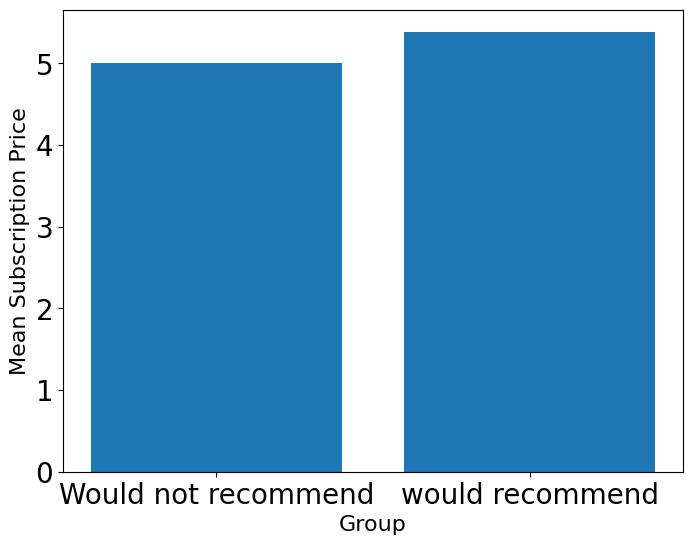

In [15]:
filter_condition = df['recommend'].isin(['احتمالا معرفی نمیکنم.', 'به هیچ وجه معرفی نمیکنم.'])
filtered_df = df[filter_condition]

mean_subscription_price_filtered = filtered_df['subscription_price'].mean()

mean_subscription_price_others = df[~filter_condition]['subscription_price'].mean()

plt.figure(figsize=(8, 6))
plt.bar(['Would not recommend', 'would recommend'], [mean_subscription_price_filtered, mean_subscription_price_others])
plt.xlabel('Group',fontsize=16)
plt.ylabel('Mean Subscription Price', fontsize=16)
# plt.title('Mean Subscription Price for Filtered Group and Others', fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()
